In [8]:
import os
import leafmap
from samgeo import SamGeo, tms_to_geotiff, get_basemaps
from samgeo.text_sam import LangSAM


In [24]:
# Define the center and bbox of the map
center = [32.77058258620389, -96.79199913948932]
bbox = [ -96.79097266620948, 32.77058258620389, -96.79199913948932,  32.76987240751506,]
# text prompt
text_prompt = "Telephone poles"
# input image
image = "satellite.tif"
# output geojson
geojson = "segment.geojson"

In [ ]:
sam = LangSAM()

In [10]:
# init map
m = leafmap.Map(center=center, zoom=18, height="800px")
m.add_basemap("SATELLITE")
# bbox = m.user_roi_bounds()

In [25]:
# download image
tms_to_geotiff(output=image, bbox=bbox, zoom=20, source="Satellite", overwrite=True)

Downloaded image 01/16
Downloaded image 02/16
Downloaded image 03/16
Downloaded image 04/16
Downloaded image 05/16
Downloaded image 06/16
Downloaded image 07/16
Downloaded image 08/16
Downloaded image 09/16
Downloaded image 10/16
Downloaded image 11/16
Downloaded image 12/16
Downloaded image 13/16
Downloaded image 14/16
Downloaded image 15/16
Downloaded image 16/16
Saving GeoTIFF. Please wait...
Image saved to satellite.tif


In [26]:
m.layers[-1].visible = False  # turn off the basemap
m.add_raster(image, layer_name="Image")

In [15]:
sam.predict(image, text_prompt, box_threshold=0.24, text_threshold=0.24)

In [ ]:
sam.show_anns(
    cmap="Greens",
    box_color="red",
    title="Automatic Segmentation of Trees",
    blend=True,
)

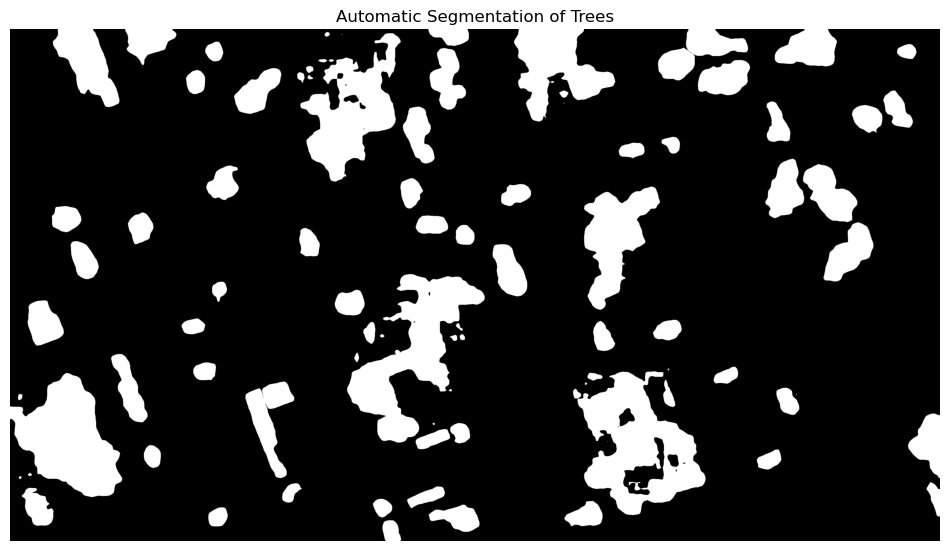

In [19]:
sam.show_anns(
    cmap="Greys_r",
    add_boxes=False,
    alpha=1,
    title="Automatic Segmentation of Trees",
    blend=False,
    output="trees.tif",
)
# save geojson


In [ ]:
style = {
    "color": "#3388ff",
    "weight": 2,
    "fillColor": "#7c4185",
    "fillOpacity": 0.5,
}
m.add_geojson(geojson, layer_name="polygons", style=style)
m